<h2 style="text-align: center; font-size: 48px;">HOUSE PRICE PREDICTION</h2>
<h1 style="text-align: center; font-size: 16px">Can We Accurately Predict the Sale Price of Houses? </h1>


# Evaluation
My goal is to achieve a high R² score, ideally above 0.9, in predicting house prices. If successful, this model will serve as a reliable tool for forecasting real estate values.

# Data
The original dataset includes diverse attributes related to the properties, such as lot size, number of rooms, location, and construction details. These features collectively describe the characteristics of each home, making it possible to develop robust regression models for price prediction. My analysis revealed the key features that drive these predictions, offering valuable insights into the dynamics of the real estate market in Ames.

In [1]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


## DATA ANALYSIS AND PREPARATION

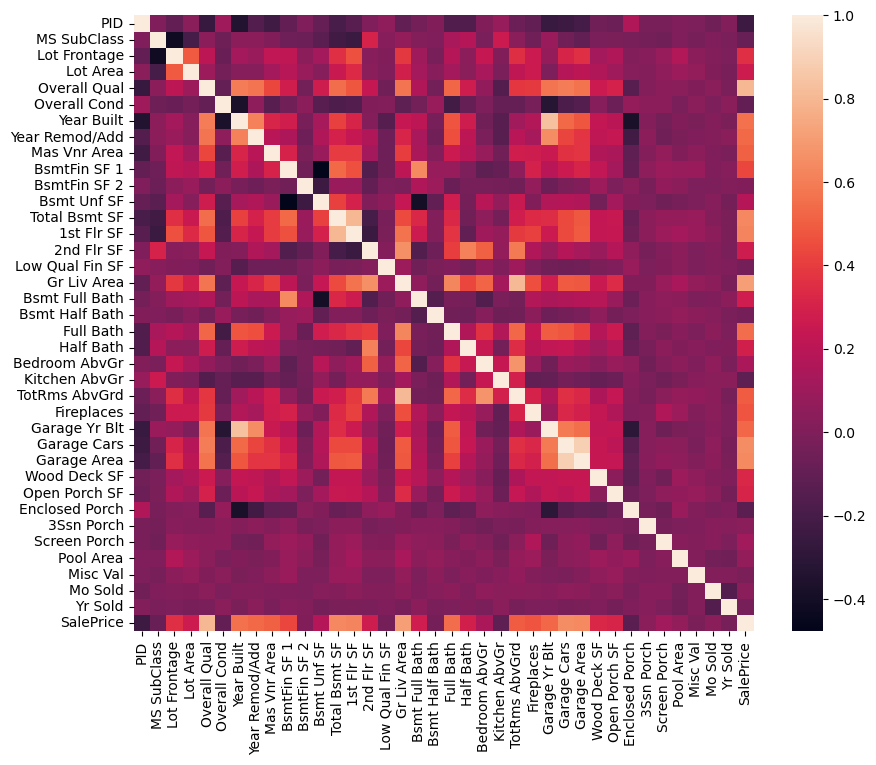

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True));

In [8]:
np.abs(df.corr(numeric_only=True)['SalePrice']).sort_values()

BsmtFin SF 2       0.005891
Misc Val           0.015691
Yr Sold            0.030569
3Ssn Porch         0.032225
Mo Sold            0.035259
Bsmt Half Bath     0.035835
Low Qual Fin SF    0.037660
Pool Area          0.068403
MS SubClass        0.085092
Overall Cond       0.101697
Screen Porch       0.112151
Kitchen AbvGr      0.119814
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
PID                0.246521
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

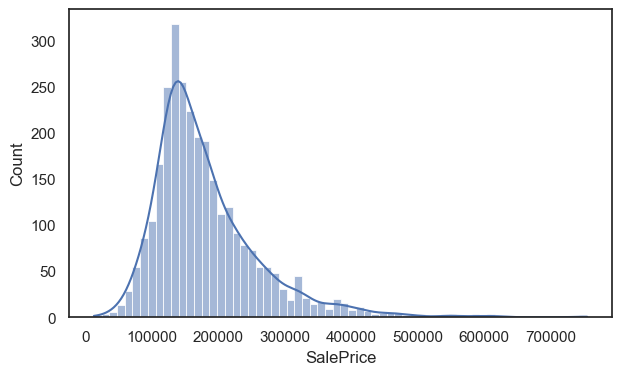

In [9]:
sns.set(style='white')
plt.figure(figsize=(7,4))
sns.histplot(df['SalePrice'], kde=True);

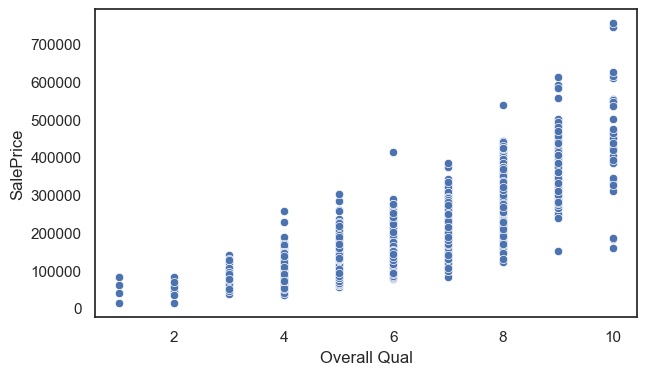

In [10]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice');

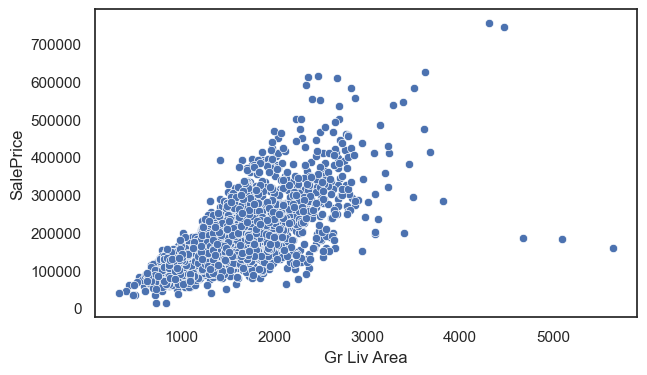

In [11]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice');

In [12]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
outliers_drop = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index

In [15]:
df = df.drop(outliers_drop, axis=0)

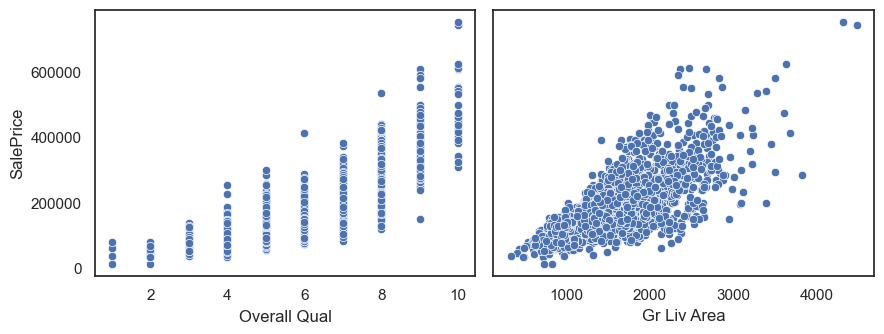

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))

sns.scatterplot(data=df, x='Overall Qual', y='SalePrice', ax=axes[0])
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', ax=axes[1])

axes[1].set_ylabel('')
axes[1].tick_params(axis='y', left=False, labelleft=False)
plt.tight_layout();

### After analyzing the two characteristics most correlated with the sale price of the house, overall quality and ground living area, I observed common outliers in both features. As a result, I decided to remove these outliers to ensure a more accurate analysis.

In [17]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [18]:
len(df['PID'].unique())

2927

In [19]:
df = df.drop('PID',axis=1)

### We already have an index, so we don't need the PID unique identifier for the analysis we will perform later on.

In [20]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [21]:
df.isnull().sum() / len(df) * 100

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [22]:
def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [23]:
percent_nan = percent_missing(df)

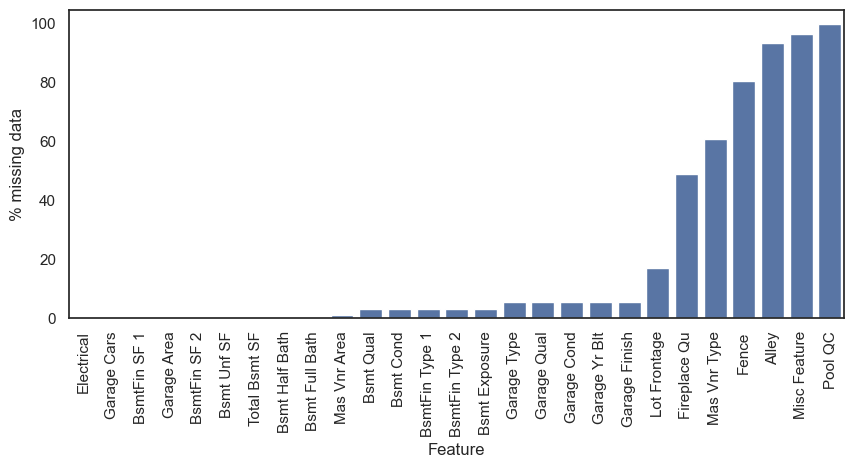

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xlabel('Feature')
plt.ylabel('% missing data')
plt.xticks(rotation=90);

### some features with very low % of data missing while others have a lot

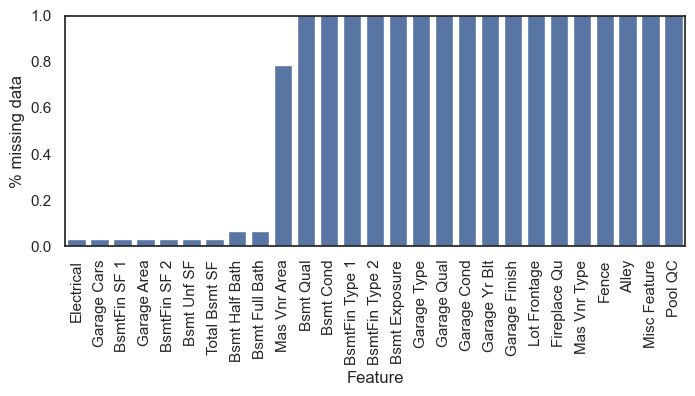

In [25]:
plt.figure(figsize=(8,3))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xlabel('Feature')
plt.ylabel('% missing data')
plt.ylim(0,1)
plt.xticks(rotation=90);

In [26]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

### Among the features with a low percentage of null values, many are related to the basement. When a house doesn’t have a basement, the data description doesn’t provide a specific value, resulting in null values. To handle this, I will fill these null values with 0 for numeric features and the string ‘None’ for categorical features. This approach maintains data integrity while accurately reflecting the absence of a basement. 
### Similarly, for the masonry veneer features, which are likely missing due to the absence of the veneer, I will fill null values with 0 for numeric features and the string ‘None’ for categorical features.
### Additionally, I will drop rows with missing values for the electrical and garage features, as these missing values are quite sparse and dropping them will have minimal impact on the overall dataset.

In [27]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [28]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [29]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [30]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [31]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [32]:
df.loc[:, "Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df.loc[:, "Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [33]:
percent_nan = percent_missing(df)

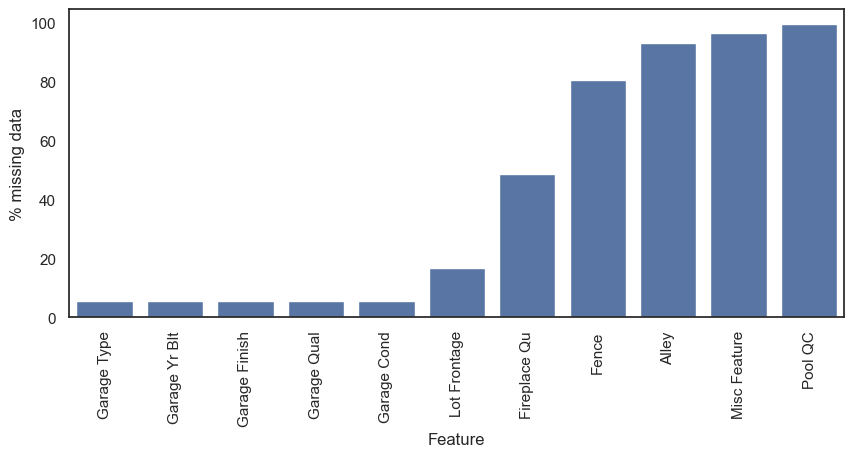

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xlabel('Feature')
plt.ylabel('% missing data')
plt.xticks(rotation=90);

### Again, many of the missing values related to the garage, even if bigger in %, are due to the absence of a garage. Therefore, I will handle these missing values similarly to the previous approach, by filling them with ‘None’ or 0.

In [35]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [36]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df.loc[:, gar_str_cols] = df[gar_str_cols].fillna('None')

In [37]:
df.loc[:, 'Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [38]:
percent_nan = percent_missing(df)

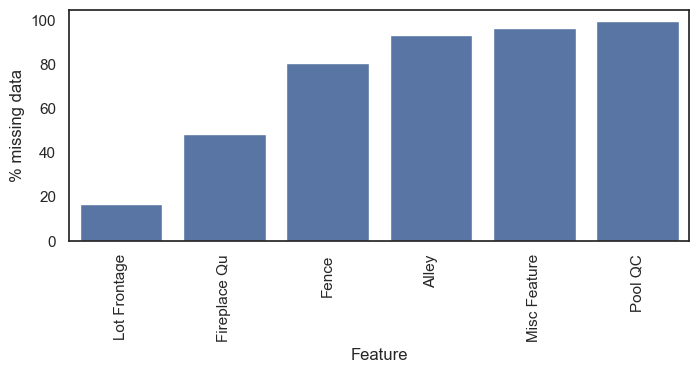

In [39]:
plt.figure(figsize=(8,3))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xlabel('Feature')
plt.ylabel('% missing data')
plt.xticks(rotation=90);

### For features with more than 80% of their values missing, I will remove these columns from the dataset. This approach helps to eliminate features with excessive missing data that could otherwise lead to unreliable or biased analysis.

In [40]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [41]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [42]:
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

In [43]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [44]:
percent_nan = percent_missing(df)

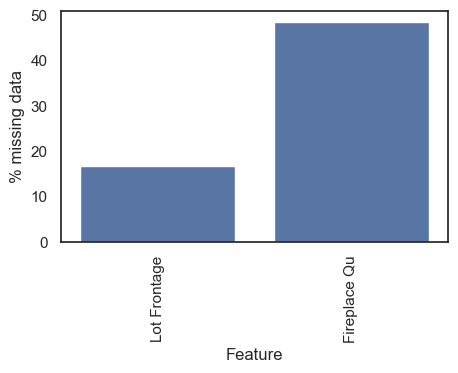

In [45]:
plt.figure(figsize=(5,3))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xlabel('Feature')
plt.ylabel('% missing data')
plt.xticks(rotation=90);

### For the fireplace quality i will keep with the approach above filling the null values.

In [46]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

### Finally, for the Lot Frontage feature, I will assume that it is related to the neighborhood in which a house is located. According to the data description, Neighborhood refers to physical locations within Ames city limits, while LotFrontage measures the linear feet of street connected to the property. Therefore, I will fill missing Lot Frontage values with the average frontage of houses in the same neighborhood. Where not present i will fill with 0.

In [47]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

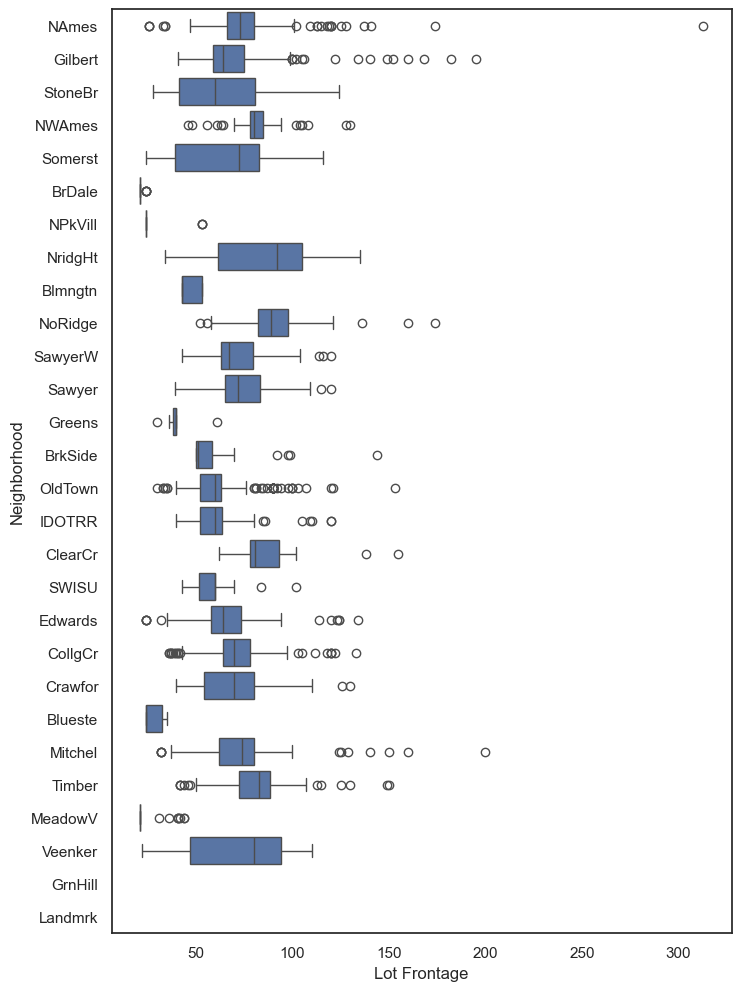

In [48]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h');

In [49]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [50]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [51]:
percent_nan = percent_missing(df)

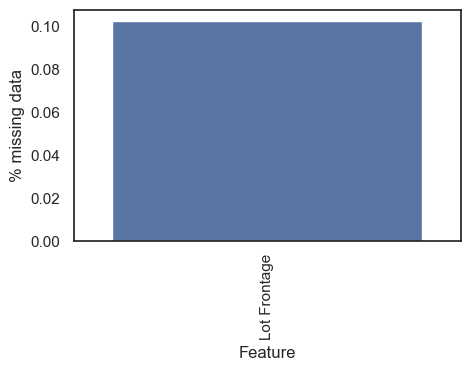

In [52]:
plt.figure(figsize=(5,3))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xlabel('Feature')
plt.ylabel('% missing data')
plt.xticks(rotation=90);

In [53]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [54]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built       29

In [56]:
sum(df.isnull().sum())

0

### Afterhandling all missing values, now i will take care of the numeric categorical one

This class for example:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [57]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

### And create dummies variabiles for Object columns

In [58]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [59]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath        29

In [60]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qual   

In [61]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [62]:
df_objs.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [63]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [64]:
df = final_df

In [65]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False


In [66]:
df.shape

(2925, 274)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: bool(238), float64(11), int64(25)
memory usage: 1.5 MB


In [68]:
sum(df.isnull().sum())

0

In [69]:
df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [70]:
df.to_csv('Ames_NO_Missing_Data.csv',index=False)

## MODELING AND PREDICTING

In [71]:
df = pd.read_csv('Ames_NO_Missing_Data.csv')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C':[0.001,0.01,0.1,0.5,1],
            'kernel':['linear','rbf','poly'],
            'gamma':['scale','auto'],
            'degree':[2,3,4],
            'epsilon':[0,0.01,0.1,0.5,1,2]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [64, 100, 128, 200, 500],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [64, 100, 128, 200, 500],
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'loss': ['linear', 'square', 'exponential']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [64, 100, 128, 200, 500],
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

In [143]:
def fit_and_evaluate_single(model_name, model_params, X_train, y_train, X_test, y_test):
    model_info = model_params.get(model_name)
    
    if model_info is None:
        raise ValueError(f"Model {model_name} not found in model_params.")
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Format results
    result = {
        'Best Parameters': grid_search.best_params_,
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R2 Score': round(r2, 4),
        'Average Price': round(np.mean(y_test), 2)
    }
    
    # Print results
    print(f"Results for {model_name}:")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Root Mean Squared Error (RMSE): ${result['RMSE']:,}")
    print(f"Mean Absolute Error (MAE): ${result['MAE']:,}")
    print(f"R2 Score: {result['R2 Score']}")
    print(f"Average House Price: ${result['Average Price']:,}")
    print('-' * 40)
    
    return result

In [146]:
linear_regression_result = fit_and_evaluate_single('LinearRegression', model_params, X_train_scaled, y_train, X_test_scaled, y_test)

print("LinearRegressor results:", linear_regression_result)

Training LinearRegression...
Results for LinearRegression:
Best Parameters: {}
Root Mean Squared Error (RMSE): $1,194,426,992,279,914.2
Mean Absolute Error (MAE): $113,572,218,132,194.2
R2 Score: -2.0084576205778485e+20
Average House Price: $183,145.83
----------------------------------------
LinearRegressor results: {'Best Parameters': {}, 'RMSE': 1194426992279914.2, 'MAE': 113572218132194.2, 'R2 Score': -2.0084576205778485e+20, 'Average Price': 183145.83}


In [145]:
svr_result = fit_and_evaluate_single('SVR', model_params, X_train_scaled, y_train, X_test_scaled, y_test)

print("SVR results:", svr_result)

Training SVR...
Results for SVR:
Best Parameters: {'C': 1, 'degree': 2, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'linear'}
Root Mean Squared Error (RMSE): $66,752.24
Mean Absolute Error (MAE): $38,515.54
R2 Score: 0.3727
Average House Price: $183,145.83
----------------------------------------
SVR results: {'Best Parameters': {'C': 1, 'degree': 2, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'linear'}, 'RMSE': 66752.24, 'MAE': 38515.54, 'R2 Score': 0.3727, 'Average Price': 183145.83}


In [153]:
random_forest_result = fit_and_evaluate_single('RandomForestRegressor', model_params, X_train_scaled, y_train, X_test_scaled, y_test)

print("RandomForestRegressor results:", random_forest_result)

Training RandomForestRegressor...
Results for RandomForestRegressor:
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64}
Root Mean Squared Error (RMSE): $24,426.9
Mean Absolute Error (MAE): $15,038.84
R2 Score: 0.916
Average House Price: $183,145.83
----------------------------------------
RandomForestRegressor results: {'Best Parameters': {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64}, 'RMSE': 24426.9, 'MAE': 15038.84, 'R2 Score': 0.916, 'Average Price': 183145.83}


In [149]:
ada_boost_result = fit_and_evaluate_single('AdaBoostRegressor', model_params, X_train_scaled, y_train, X_test_scaled, y_test)

print("AdaBoostRegressor results:", ada_boost_result)

Training AdaBoostRegressor...
Results for AdaBoostRegressor:
Best Parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
Root Mean Squared Error (RMSE): $28,745.89
Mean Absolute Error (MAE): $21,153.4
R2 Score: 0.8837
Average House Price: $183,145.83
----------------------------------------
AdaBoostRegressor results: {'Best Parameters': {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}, 'RMSE': 28745.89, 'MAE': 21153.4, 'R2 Score': 0.8837, 'Average Price': 183145.83}


In [150]:
grad_boost_result = fit_and_evaluate_single('GradientBoostingRegressor', model_params, X_train_scaled, y_train, X_test_scaled, y_test)

print("GradientBoostingRegressor results:", grad_boost_result)

Training GradientBoostingRegressor...
Results for GradientBoostingRegressor:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Root Mean Squared Error (RMSE): $17,991.02
Mean Absolute Error (MAE): $11,851.11
R2 Score: 0.9544
Average House Price: $183,145.83
----------------------------------------
GradientBoostingRegressor results: {'Best Parameters': {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}, 'RMSE': 17991.02, 'MAE': 11851.11, 'R2 Score': 0.9544, 'Average Price': 183145.83}


### the Gradient Boosting Regressor emerged as the best model, delivering the most accurate predictions with great scores. Given these results, I decided to proceed with the Gradient Boosting model for the final predictions.

## BEST MODEL

In [74]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [75]:
final_model = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500)

final_model.fit(X_scaled, y)

GradientBoostingRegressor(min_samples_split=10, n_estimators=500,
                          random_state=42)

In [76]:
y_preds = final_model.predict(X_scaled)

In [77]:
rmse = np.sqrt(mean_squared_error(y, y_preds))
mae = mean_absolute_error(y, y_preds)
r2 = r2_score(y, y_preds)

In [78]:
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

R2 Score: 0.9851
Mean Absolute Error (MAE): $7,436.74
Root Mean Squared Error (RMSE): $9,756.22


## FEATURE IMPORTANCES

In [81]:
feat_imp = final_model.feature_importances_

In [84]:
def plot_features(columns, importance, n=20):
    df = pd.DataFrame({
        'features': columns,
        'importance': importance
    }).sort_values('importance', ascending=False).reset_index(drop=True)
    
    sns.set(style='white')
    plt.figure(figsize=(8, 6))    
    sns.barplot(x='importance', y='features', data=df.head(n))    
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Top 20 Most Important Features')
    plt.show()

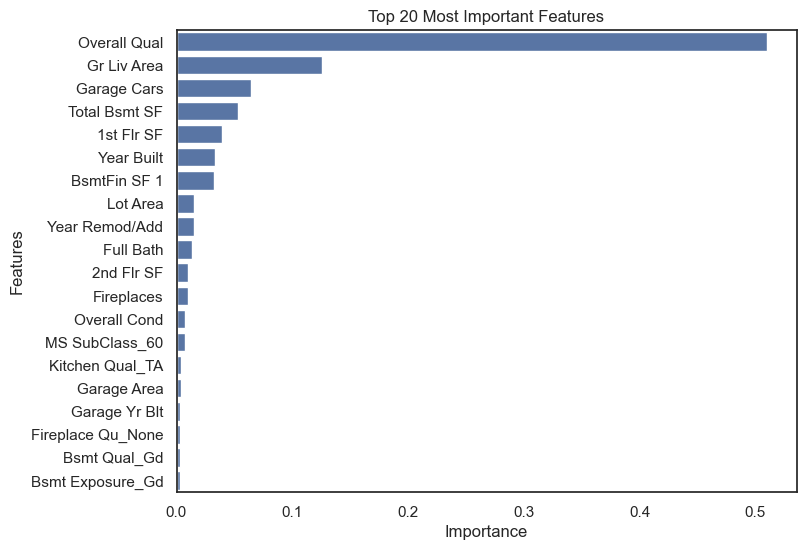

In [85]:
plot_features(X.columns, feat_imp)

### This analysis revealed which features had the most significant impact on the model’s predictions and we can see how the Overall Quality play a fondamental role.

## RESIDUAL ANALYSIS

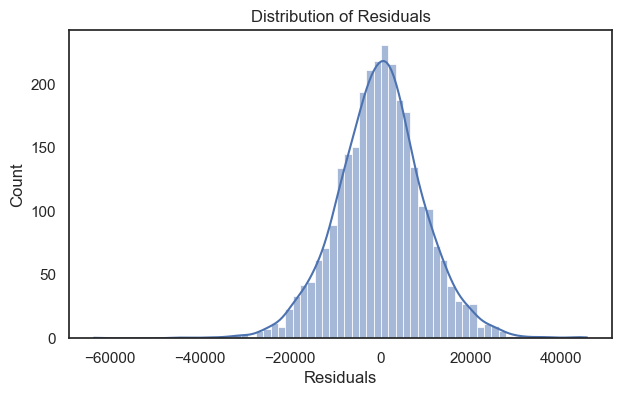

In [87]:
residuals = y - y_preds
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

### By plotting the residuals I checked for patterns that could indicate issues such as heteroscedasticity or non-linearity. The residuals appeared to be randomly distributed around zero, suggesting that the model was well-fitted and did not suffer from major biases.

## DEPLOYMENT

In [92]:
import joblib

In [94]:
joblib.dump(final_model, 'house_price_pred_model.pkl')

['house_price_pred_model.pkl']